# Assignment 8(Week 9)

## Name: Theresa Louise Bazudde

### Data Columns
- Review Title: The title of the review.
- Review_Text: The full text of the review.
- Verified_Buyer: Whether the reviewer is a verified buyer of the product.
- Review_Date: The date the review was published relative to the review scrape date.
- Review_Location: The location of the reviewer.
- Review_Upvotes: How many times the review was upvoted by other reviewers.
- Review_Downvotes: How many times the review was downvoted by other reviewers.
- Product: The name of the product the review was issued for.
- Brand: The brand of the product.
- Scrape Date: The date the data was pulled from the web.

### Objectives
1. Exploratory Data Analysis.
2. Sentiments Analysis.

In [1]:
# Built-in library
import itertools
import re
from typing import Any, Optional, Sequence, Union

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 1_000

#removing stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

#Lemmatizing
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

#word cloud
from wordcloud import WordCloud

#sentient analysis
from textblob import TextBlob


#machine learning model
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Loading the data

In [2]:
df = pd.read_csv(r"C:\Users\user\Documents\Folder\CSV\UltaSkincareReviews.csv")
df.head()

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date
0,Perfect,Love using this on my face while in the shower. Heats up and gives a light scrub nicely,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
1,You need this,Even better than the daily microfoliant. I'm obsessed. My skin is SO MUCH smoother,No,27 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
2,Clean skin,Enjoy this product so much ! I look forward to using it - really feels great.,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
3,Love This Stuff!,I've never tried anything like this before and I love it. When you apply it to your face you get a little shot of warm that feels so good. The scrub seems very gritty but the only side effects I've encountered have been positive ones.,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
4,This exfoliates very nicely and,"This exfoliates very nicely and gives a very smooth skin after with no irritation and no reaction to the skin . I highly recommended it, i will buy it again.",No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23


In [3]:
#dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4150 entries, 0 to 4149
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Review_Title      4150 non-null   object
 1   Review_Text       4148 non-null   object
 2   Verified_Buyer    4150 non-null   object
 3   Review_Date       4150 non-null   object
 4   Review_Location   4149 non-null   object
 5   Review_Upvotes    4150 non-null   int64 
 6   Review_Downvotes  4150 non-null   int64 
 7   Product           4150 non-null   object
 8   Brand             4150 non-null   object
 9   Scrape_Date       4150 non-null   object
dtypes: int64(2), object(8)
memory usage: 324.3+ KB


The data contains both numerical and categorical data.

## Exploratoty Data Analysis

The following analysis will be performed
<br>-checking for null values and removing them
<br>-converting the Review_Text column to string data type
<br>-converting Review_Text column to lowercase
<br>-changing all contractions to their full form
<br>-making count plots to know which products were reviewed more
<br>-using regex function to find out which common issues the buyers have and the percentage that has said issue

As I did not collect the data myself, I must check for null values as they would cause errors down the line

In [4]:
# Checking for null values
df.isna().sum()

Review_Title        0
Review_Text         2
Verified_Buyer      0
Review_Date         0
Review_Location     1
Review_Upvotes      0
Review_Downvotes    0
Product             0
Brand               0
Scrape_Date         0
dtype: int64

The dataset is large and threfore removing a few data points would cause a major difference.

In [5]:
#removing null values
df = df[~df["Review_Text"].isnull()]
df = df[~df["Review_Location"].isnull()]

In [6]:
#checking if the null are gone
df.isnull().sum()

Review_Title        0
Review_Text         0
Verified_Buyer      0
Review_Date         0
Review_Location     0
Review_Upvotes      0
Review_Downvotes    0
Product             0
Brand               0
Scrape_Date         0
dtype: int64

So as to have uniform data types in the column, all data is changed to string.

In [7]:
# Changing all reviews to string variables
df['Review_Text'] = df["Review_Text"].astype(str)

As python is a case sensitive language, the review text must all be in lower case so that for example the word Love and love would falsely be identified as different words.

In [8]:
# Changing all to lower case
df['Review_Text'] = df['Review_Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df.head()

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date
0,Perfect,love using this on my face while in the shower. heats up and gives a light scrub nicely,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
1,You need this,even better than the daily microfoliant. i'm obsessed. my skin is so much smoother,No,27 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
2,Clean skin,enjoy this product so much ! i look forward to using it - really feels great.,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
3,Love This Stuff!,i've never tried anything like this before and i love it. when you apply it to your face you get a little shot of warm that feels so good. the scrub seems very gritty but the only side effects i've encountered have been positive ones.,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
4,This exfoliates very nicely and,"this exfoliates very nicely and gives a very smooth skin after with no irritation and no reaction to the skin . i highly recommended it, i will buy it again.",No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23


All contractions in the review text column are converted to their full form fpr better analysis
A dictionary containing contractions and their full forms is created then passed to a function that converts them to their full form.

In [9]:
#a dictionary of contractions
contractions = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "cannot",
    "couldn't": "could not",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'll": "he will",
    "he's": "he is",
    "i'd": "i would",
    "i'll": "i will",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it's": "it is",
    "let's": "let us",
    "mustn't": "must not",
    "shan't": "shall not",
    "she'd": "she would",
    "she'll": "she will",
    "she's": "she is",
    "shouldn't": "should not",
    "that's": "that is",
    "there's": "there is",
    "they'd": "they would",
    "they'll": "they will",
    "they're": "they are",
    "they've": "they have",
    "we'd": "we would",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "where's": "where is",
    "who'll": "who will",
    "who's": "who is",
    "won't": "will not",
    "wouldn't": "would not",
    "you'd": "you would",
    "you'll": "you will",
    "you're": "you are",
    "you've": "you have",
    "'s": " is"
}
#changing contactions to full form
df['Review_Text'] = df['Review_Text'].apply(lambda x: ' '.join([contractions.get(word, word) for word in x.split()]))
df.head()

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date
0,Perfect,love using this on my face while in the shower. heats up and gives a light scrub nicely,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
1,You need this,even better than the daily microfoliant. i am obsessed. my skin is so much smoother,No,27 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
2,Clean skin,enjoy this product so much ! i look forward to using it - really feels great.,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
3,Love This Stuff!,i have never tried anything like this before and i love it. when you apply it to your face you get a little shot of warm that feels so good. the scrub seems very gritty but the only side effects i have encountered have been positive ones.,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
4,This exfoliates very nicely and,"this exfoliates very nicely and gives a very smooth skin after with no irritation and no reaction to the skin . i highly recommended it, i will buy it again.",No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23


A count plot for the products to determine which product is more popular amongst those reviewed

<AxesSubplot:xlabel='count', ylabel='Product'>

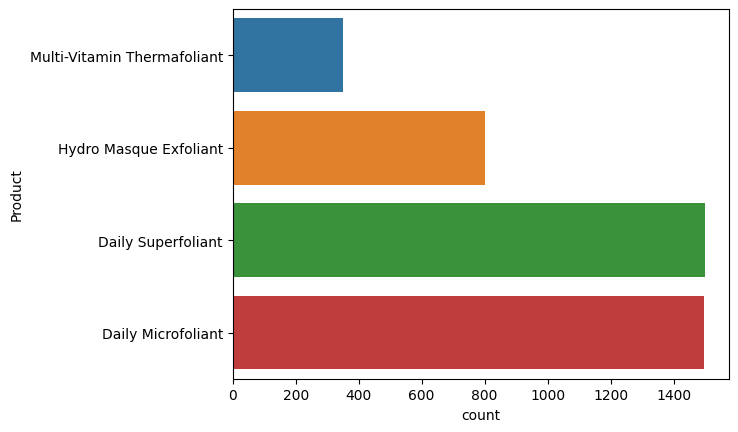

In [10]:
#products
sns.countplot(y='Product', data=df)

#### Conclusion
Daily Superfoliant and Daily Microfoliant are the most popular among the reviewed products

#### What issues are most common among buyers?
I searched for the top skin issues and used a regex function to detect whether the buyers had these issues.
<br>Top issues are acne, pimples, eczema, sunburn, rashes, dermatitis.
<br>A bar chart was then plotted to know which was most common.


C:\Users\user\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


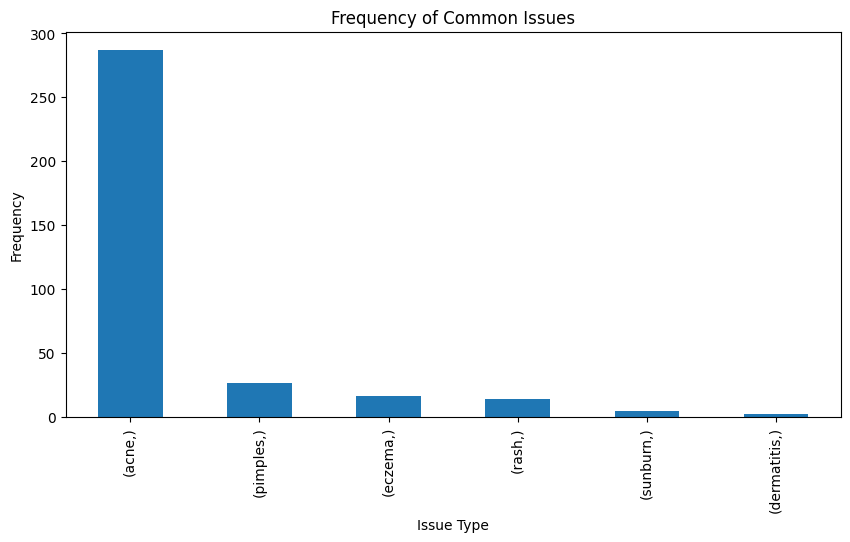

In [11]:
pattern_issues = r"(eczema|pimple\w+|acne|rash|\w+burn|dermatitis)"
issues = df[df["Review_Text"].str.contains(pat=pattern_issues)]


# count the frequency of each issue type
issue_counts = issues["Review_Text"].str.extractall(pattern_issues).value_counts()


# plot the frequency of each issue type in a bar plot
plt.figure(figsize=(10, 5))
issue_counts.plot(kind="bar")
plt.title("Frequency of Common Issues")
plt.xlabel("Issue Type")
plt.ylabel("Frequency")
plt.show()

#### Conclusion
Acne is the most common skin issue

#### Do most buyers have common skincare issues?
Using the pattern established above, a piechart was then constructed to show percentage of buyers that reported these common skin issues.

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


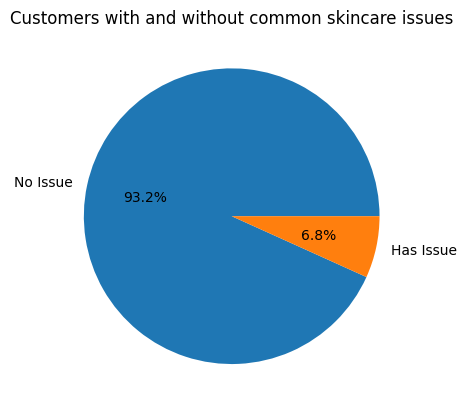

In [12]:
df["has_issue"] = df["Review_Text"].str.contains(pat=pattern_issues)
issue_counts = df.groupby("has_issue").size()
labels = ["No Issue", "Has Issue"]
plt.pie(issue_counts, labels=labels, autopct="%1.1f%%")
plt.title("Customers with and without common skincare issues")
plt.show()

Majority of customers did not report common skin issues

## Word Cloud

Word Cloud was constructed for each product to showcase the 20 most common words in the buyer's reviews.

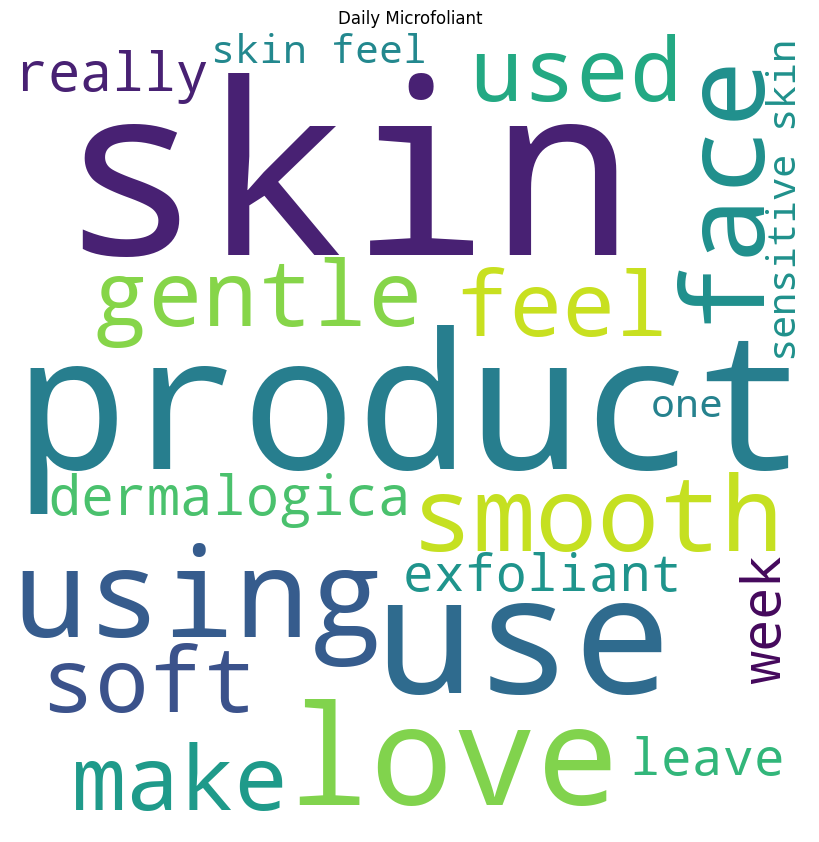

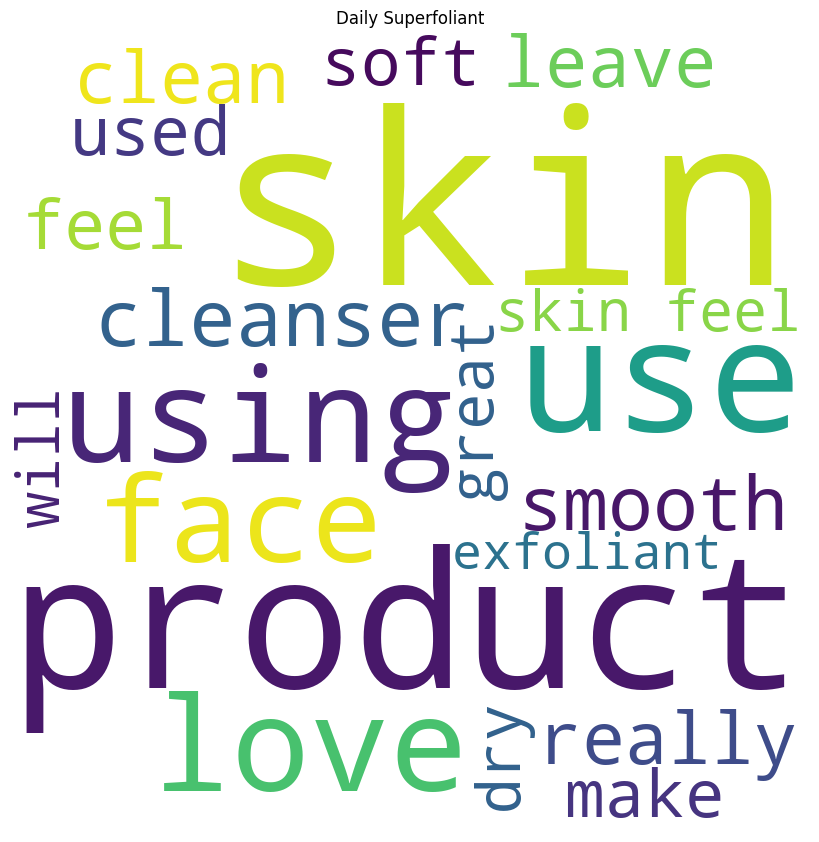

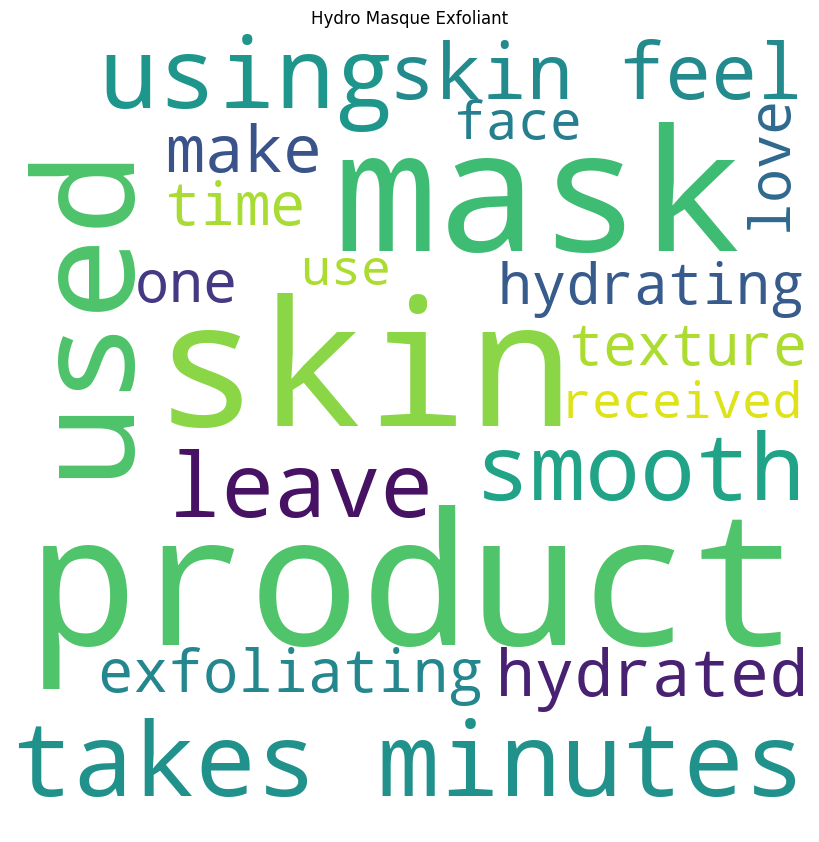

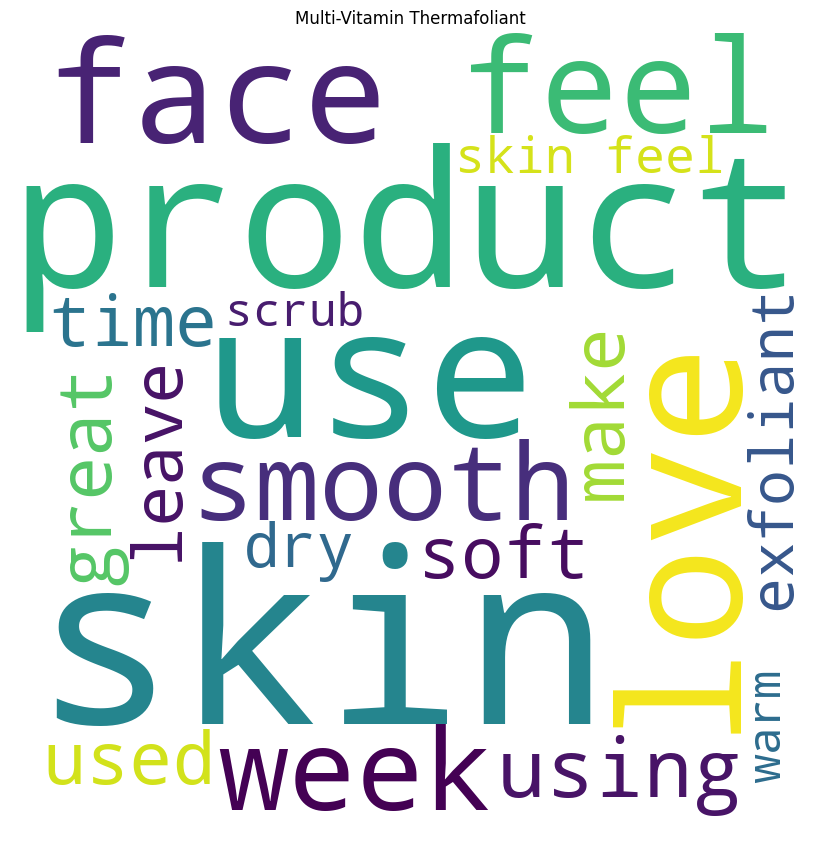

In [13]:
grouped_reviews = df.groupby('Product')['Review_Text'].apply(lambda x: ' '.join(x)).reset_index()

# create a word cloud for each product
for index, row in grouped_reviews.iterrows():
    product = row['Product']
    text = row['Review_Text']
    wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=20, contour_width=3, contour_color='steelblue').generate(text)
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.title(product)
    plt.show()

## Sentient Analysis
Questions to be answered are
<ol>
<li>Are most reviews positive or negative?</li>
<li>Which products have majority negative reviews?</li>
<li>Which have majority positive reviews?</li></ol>

Stop words like 'the', 'and' etc are removed as they are redundant.

In [14]:
stop = stopwords.words('english')
df['Review_Text'] = df['Review_Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df.head()

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date,has_issue
0,Perfect,love using face shower. heats gives light scrub nicely,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,False
1,You need this,even better daily microfoliant. obsessed. skin much smoother,No,27 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,False
2,Clean skin,enjoy product much ! look forward using - really feels great.,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,False
3,Love This Stuff!,never tried anything like love it. apply face get little shot warm feels good. scrub seems gritty side effects encountered positive ones.,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,False
4,This exfoliates very nicely and,"exfoliates nicely gives smooth skin irritation reaction skin . highly recommended it, buy again.",No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,False


Lemmatising cuts words like 'running' to 'run' so that the root word is used to establish similarities.

In [15]:
#lemmatising
df['Review_Text'] = df['Review_Text'].apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()]))
df.head(5)

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date,has_issue
0,Perfect,love using face shower. heat give light scrub nicely,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,False
1,You need this,even better daily microfoliant. obsessed. skin much smoother,No,27 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,False
2,Clean skin,enjoy product much ! look forward using - really feel great.,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,False
3,Love This Stuff!,never tried anything like love it. apply face get little shot warm feel good. scrub seems gritty side effect encountered positive ones.,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,False
4,This exfoliates very nicely and,"exfoliates nicely give smooth skin irritation reaction skin . highly recommended it, buy again.",No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,False


Special characters are also removed as they add no meaning to the sentient analysis.

In [16]:
#removing special characters
df['Review_Text'] = df['Review_Text'].apply(lambda x: re.sub('[^A-Za-z0-9\s]+', '', x))
df.head()

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date,has_issue
0,Perfect,love using face shower heat give light scrub nicely,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,False
1,You need this,even better daily microfoliant obsessed skin much smoother,No,27 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,False
2,Clean skin,enjoy product much look forward using really feel great,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,False
3,Love This Stuff!,never tried anything like love it apply face get little shot warm feel good scrub seems gritty side effect encountered positive ones,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,False
4,This exfoliates very nicely and,exfoliates nicely give smooth skin irritation reaction skin highly recommended it buy again,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,False


### TextBlob polarity
TextBlob uses a machine learning algorithm to classify the sentiment of text as either positive or negative. 
<br> It has a built-in feature that is used to classify text as positive or negative based on a set of predefined words and their associated polarities. 
<br>Polarity is between -1 and 1 with negative words giving rise to negative values and positive words giving positive values.


In [17]:
#polarity of the reviews
df['Polarity'] = df['Review_Text'].map(lambda x: TextBlob(x).sentiment.polarity)
df.head()

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date,has_issue,Polarity
0,Perfect,love using face shower heat give light scrub nicely,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,False,0.500000
1,You need this,even better daily microfoliant obsessed skin much smoother,No,27 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,False,0.050000
2,Clean skin,enjoy product much look forward using really feel great,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,False,0.400000
3,Love This Stuff!,never tried anything like love it apply face get little shot warm feel good scrub seems gritty side effect encountered positive ones,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,False,0.306629
4,This exfoliates very nicely and,exfoliates nicely give smooth skin irritation reaction skin highly recommended it buy again,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,False,0.386667


### Polarity distribution
The distribution of polarities amongst the various reviews is exmined to know whether most customers are happy or not

array([[<AxesSubplot:title={'center':'Polarity'}>]], dtype=object)

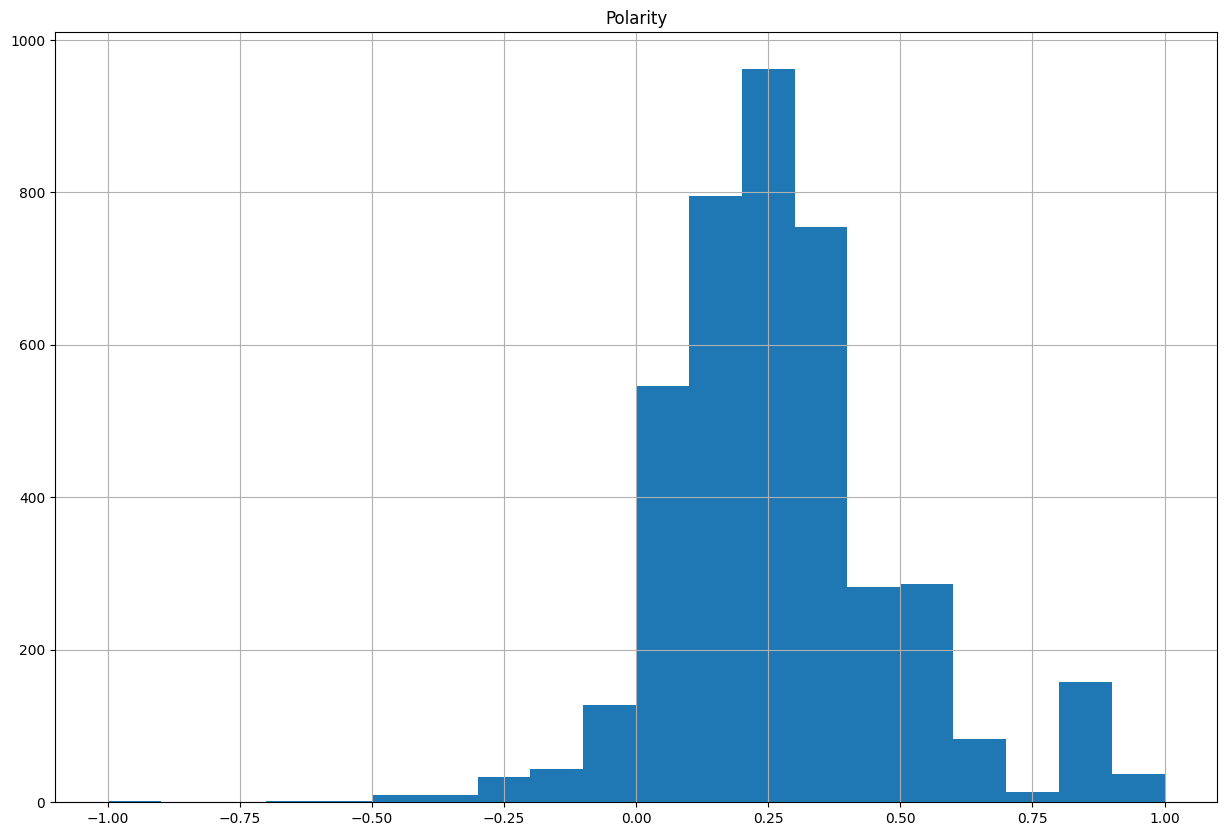

In [18]:
#seeing polarity distribution
df[["Polarity"]].hist(bins=20, figsize=(15, 10))

#### Conclusion
Since majority of the data exists to the right of zero (skewed to the right), this indicates most of the reviews are positive.

These polarities are then converted to a sentient (either positive or negative) based on whether they're less than or greater than zero.

In [19]:
df['Sentiment'] = df['Polarity'].apply(lambda x: 'positive' if x >= 0 else 'negative')

### Polarities for the different products
A count plot is used to analyze the different products and their sentients. The aim is to find out whether some products have more negative reviews than positive ones.

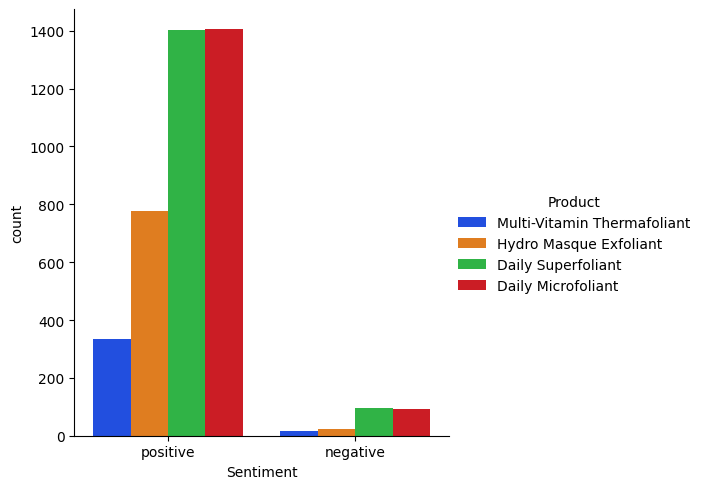

In [20]:
g = sns.catplot(x='Sentiment', kind='count', data=df, hue='Product', palette='bright')

### Conclusion
<ul>
<li>The Daily Microfoliant has the greatest number of good reviews while the Daily Superfoliant has the greated number of bad reviews</li>
<li>All products have more positive reviews than negative ones.</li>
</ul>

## Machine learning model

The data was split into training data and test data using the train_test_split method. It was then vectorized using the term frequency-inverse document frequency (TF-IDF) method with the TfidfVectorizer() class.

A linear support vector machine (SVM) classifier was then trained on the training data using the LinearSVC() class

Finally, a classifier report including precision, F1 score and accuracy was generated using the classification report method.

In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Review_Text'], df['Sentiment'], test_size=0.2)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Train a linear support vector machine (SVM) classifier
clf = LinearSVC()
clf.fit(X_train, y_train)



LinearSVC()

##### Evaluating the model

In [22]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.58      0.16      0.25        44
    positive       0.95      0.99      0.97       786

    accuracy                           0.95       830
   macro avg       0.77      0.58      0.61       830
weighted avg       0.94      0.95      0.94       830



In conclusion, the built model is quite good giving an accuracy of about 97%